In [ ]:
# Importing libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
PATH = '/content/drive/MyDrive/Crop_recommendation.xls'
df = pd.read_csv(PATH)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
print(df.size)
print(df.shape)
print(df.columns)

17600
(2200, 8)
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
#Seperating features and target label
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [ ]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [ ]:
#Saving trained Decision Tree mode

import pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [ ]:
#NB
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [ ]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [ ]:
#Saving trained Guassian Naive Bayes model
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [ ]:
#svm
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.10681818181818181
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0.

In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

In [ ]:
#lr
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [ ]:
import pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [ ]:
#rf
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [ ]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [ ]:
import pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

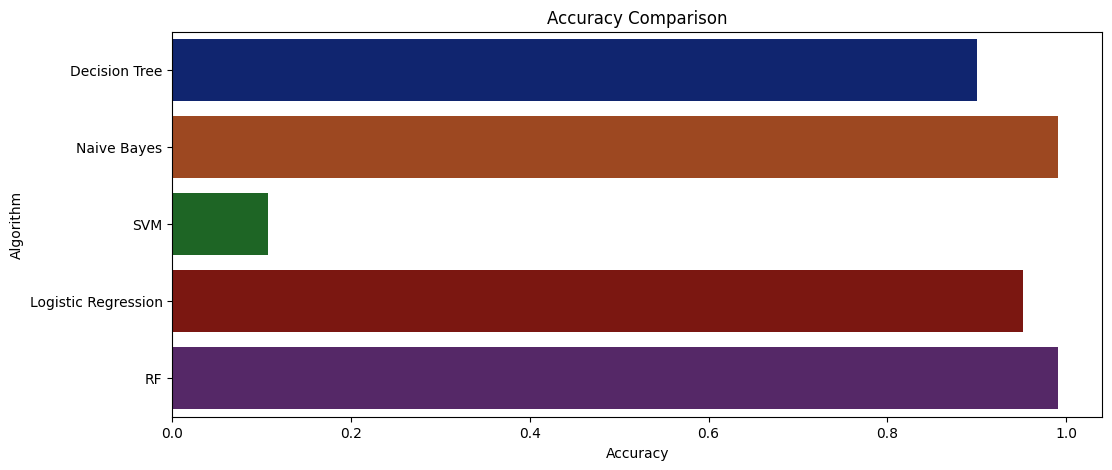

In [ ]:
#accuracy comparison
plt.figure(figsize=[12,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.10681818181818181
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091


In [ ]:
#making prediction
data = np.array([[50,18, 300, 30, 50,5, 100]])
prediction = RF.predict(data)
print(prediction)

['mango']


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.4 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image
import requests
from io import BytesIO
import pandas as pd
import pickle
import numpy as np

# Load the RandomForest model
with open('/content/RandomForest.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Function to get the local path of the crop image
def get_crop_image_path(crop_type):
    crop_images = {
        'apple': '/content/drive/MyDrive/crop images/apple.jpg',
        'banana': '/content/drive/MyDrive/crop images/bananas.jpg',
        'blackgram':'/content/drive/MyDrive/crop images/black-gram-urad-dal.jpg',
        'chickpea':'/content/drive/MyDrive/crop images/chickpea.jpg',
        'coconut':'/content/drive/MyDrive/crop images/coconut.jpg',
        'coffee':'/content/drive/MyDrive/crop images/coffee-beans.jpg',
        'cotton':'/content/drive/MyDrive/crop images/cotton.jpg',
        'grapes':'/content/drive/MyDrive/crop images/grapes.jpg',
        'jute':'/content/drive/MyDrive/crop images/jute.jpg',
        'kidneybeans':'/content/drive/MyDrive/crop images/kidneybeans.jpg',
        'lentil':'/content/drive/MyDrive/crop images/lentil.jpg',
        'maize':'/content/drive/MyDrive/crop images/maize.jpg',
        'mango':'/content/drive/MyDrive/crop images/mango.jpg',
        'mothbeans':'/content/drive/MyDrive/crop images/mothbean.jpg',
        'mungbean':'/content/drive/MyDrive/crop images/mungbean.png',
        'muskmelon':'/content/drive/MyDrive/crop images/muskmelon.jpg',
        'orange':'/content/drive/MyDrive/crop images/orange.jpg',
        'papaya':'/content/drive/MyDrive/crop images/papaya.jpg',
        'pigeonpeas':'/content/drive/MyDrive/crop images/pigeonpeas.jpg',
        'pomegranate':'/content/drive/MyDrive/crop images/pomegranate.jpg',
        'rice':'/content/drive/MyDrive/crop images/rice.jpg',
        'watermelon':'/content/drive/MyDrive/crop images/watermelon.jpg'
    }
    return crop_images.get(crop_type, '/content/drive/MyDrive/crop images/imagenotfound.png')  # Default image if type not found

# Streamlit page config
st.set_page_config(page_title="Smart Harvest App", page_icon=":seedling:")

# Sidebar with Smart Harvest App title and project information
st.sidebar.title("Smart Harvest App")
st.sidebar.write("Project by Jivitesh P")
st.sidebar.write("II Msc.ADS RA2232014010048")

# Dropdown menu for selecting options
option = st.sidebar.selectbox("Select Option", ["Crop Prediction", "Agri News", "Agri Chatbot"])

# Display content based on the selected option
if option == "Crop Prediction":
    st.title('Smart Harvest - Crop Prediction App')

    # Input fields
    N = st.slider('Nitrogen (N)', min_value=0, max_value=200, step=1, value=0)
    P = st.slider('Phosphorus (P)', min_value=0, max_value=200, step=1, value=0)
    K = st.slider('Potassium (K)', min_value=0, max_value=200, step=1, value=0)
    temperature = st.slider('Temperature', min_value=0, max_value=40, step=1, value=0)
    humidity = st.slider('Humidity', min_value=0, max_value=100, step=1, value=int(70.3))  # Cast to int
    ph = st.slider('pH', min_value=0.0, max_value=14.0, step=0.1, value=4.0)
    rainfall = st.slider('Rainfall', min_value=0, max_value=500, step=1, value=0)

    # Predict button
    if st.button('Predict'):
        # Prepare input data for prediction
        data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

        # Make prediction
        prediction = model.predict(data)[0]

        # Display the predicted crop type
        st.success(f'Predicted Crop Type: {prediction}')

        # Display crop image based on the predicted crop type with reduced size
        crop_image_path = get_crop_image_path(prediction)
        crop_image = Image.open(crop_image_path).resize((200, 200))
        st.image(crop_image, caption=f'{prediction} crop', use_column_width=False, width=150)

    # Clear button
    if st.button('Clear'):
        st.session_state.clear()  # Clear session state to reset input values


elif option == "Agri News":
    st.title('Smart Harvest - Agri News App')

    class NewsApp:
        def __init__(self):
            # fetch data
            self.data = requests.get('https://newsapi.org/v2/everything?q=crops-agriculture-farmer-kisan&apiKey=971faaac2bfb466a82295070fdf2bf95').json()
            # initialize index for news slider
            self.index = 0

        def load_news_item(self, index):
            # image
            try:
                img_url = self.data['articles'][index]['urlToImage']
                image = Image.open(BytesIO(requests.get(img_url).content)).resize((500, 500))
            except:
                img_url = 'https://www.hhireb.com/wp-content/uploads/2019/08/default-no-img.jpg'
                image = Image.open(BytesIO(requests.get(img_url).content)).resize((500, 500))

            st.image(image, caption=self.data['articles'][index]['title'], use_column_width=True)

            st.header(self.data['articles'][index]['title'])

            st.write(self.data['articles'][index]['description'])

            st.markdown(f"[Read More]({self.data['articles'][index]['url']})")

        def display_app(self):
            # Show the news slider
            self.index = st.slider("Select News", 0, len(self.data['articles']) - 1, self.index)

            # Display the selected news item
            self.load_news_item(self.index)

    obj = NewsApp()
    obj.display_app()

elif option == "Agri Chatbot":
    st.title('Smart Harvest - Agri Chatbot App')
    st.write("This is a blank page for the Agri Chatbot option.")







Overwriting app.py


In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.106.95.194


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

[..................] | fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.95.194:8501

npx: installed 22 in 2.922s
your url is: https://orange-aliens-matter.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitte